In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "path/to/folder/iiit-d-2021"

In [ ]:
!pwd
!ls -shH

# Methods and techniques used -


1.   Simple CNN network since there were only 62*40 - 2480 images. The standard models such as ResNet, InceptionNet n etc. are image hungry i.e. are dependent on a large no. of images. 
2.   The dataset had 62 folders named as 'Sample00i', where i is in [1,62], and each folder had 40 images of same alphabet/character - ([a-z], [A-Z], [0-9] ), I took the class labels as 1-62 (extracted from the folder name eg. label=14 for all the images in Sample014)
  Thus total 62 class labels are there.
3. This task is a part of supervised learning, since classes labels are provided to model. Thus deep learning is used. ??? (edit)
4. For classification, instead of 62 classes, I have used concept of linear regression that outputs values from 1-62 .
5. Since the images are 3 channeled and their shape is 620*1900, I have reshaped them to (150,200,3) maintaining the aspect ratio. Also almost all the images had features in the center, where cropping could have been used. But some images were to the left/right, so cropping is not used instead I have resized the images. This makes the computation take less time.
6. The loss function used id - 'mse' i.e. Mean Squared Error and metric to be seen is - 'mae' i.e Mean Absolute Error.
7. Training dataset is split in 75:25 for training:validation dataset.



1.   pyimagesearch - image reshaping
2.   Tensorflow docuentation
3. https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/



## Downloading the training dataset and extracting it 

In [ ]:
!wget https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip

--2021-04-05 17:40:58--  https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pan6mutc5xj5kj0/trainPart1.zip [following]
--2021-04-05 17:40:58--  https://www.dropbox.com/s/raw/pan6mutc5xj5kj0/trainPart1.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc850540a2fc8dc5134b04326d65.dl.dropboxusercontent.com/cd/0/inline/BMBnMyuFXWtHt86Xgvjo4Ghr5WousSwChlVJ7G0FEhm0QWroTNyOCqRSJ0m6sk5LILA1ivzQOdfwOGeNLcq7srdS3OrA_MIBXLDRX0gU_M1SHvLJOT6PHHriHstlTdO1KwcIgJHGHbK5V6b_mZvlxgD7/file# [following]
--2021-04-05 17:40:59--  https://uc850540a2fc8dc5134b04326d65.dl.dropboxusercontent.com/cd/0/inline/BMBnMyuFXWtHt86Xgvjo4Ghr5WousSwChlVJ7G0FEhm0QWroTNyOCqRSJ0m6sk5LILA1ivzQOdfwOGeNL

In [ ]:
#extracting the files
!unzip trainPart1.zip

Archive:  trainPart1.zip
   creating: train/
   creating: train/Sample002/
  inflating: train/Sample002/img002-048.png  
  inflating: train/Sample002/img002-050.png  
  inflating: train/Sample002/img002-006.png  
  inflating: train/Sample002/img002-004.png  
  inflating: train/Sample002/img002-053.png  
  inflating: train/Sample002/img002-045.png  
  inflating: train/Sample002/img002-052.png  
  inflating: train/Sample002/img002-047.png  
  inflating: train/Sample002/img002-020.png  
  inflating: train/Sample002/img002-009.png  
  inflating: train/Sample002/img002-011.png  
  inflating: train/Sample002/img002-013.png  
  inflating: train/Sample002/img002-034.png  
  inflating: train/Sample002/img002-038.png  
  inflating: train/Sample002/img002-024.png  
  inflating: train/Sample002/img002-025.png  
  inflating: train/Sample002/img002-018.png  
  inflating: train/Sample002/img002-032.png  
  inflating: train/Sample002/img002-028.png  
  inflating: train/Sample002/img002-001.png  
  inf

In [ ]:
!ls train

Sample001  Sample010  Sample019  Sample028  Sample037  Sample046  Sample055
Sample002  Sample011  Sample020  Sample029  Sample038  Sample047  Sample056
Sample003  Sample012  Sample021  Sample030  Sample039  Sample048  Sample057
Sample004  Sample013  Sample022  Sample031  Sample040  Sample049  Sample058
Sample005  Sample014  Sample023  Sample032  Sample041  Sample050  Sample059
Sample006  Sample015  Sample024  Sample033  Sample042  Sample051  Sample060
Sample007  Sample016  Sample025  Sample034  Sample043  Sample052  Sample061
Sample008  Sample017  Sample026  Sample035  Sample044  Sample053  Sample062
Sample009  Sample018  Sample027  Sample036  Sample045  Sample054


### installing required libraries

In [32]:
import os
import glob
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [34]:
#importing all the required libraries
#from collections import Counter
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import seaborn as sns
sns.set()

#  Data preprocessing, model building and training

In [33]:
# normalize, standardize, augment 
path = "./train/"
dir = os.listdir(path)
print(dir)

imgs = []
labels = []
y_out = []
for d in dir:
  #print(d)
  #img_by_dir.append(os.listdir(path + d))
  
  p = path + d
  imgs = imgs + glob.glob(p + "/*.png")
  l = [int(d[6:])-1]
  labels.append(int(d[6:])-1)
  y_out = y_out + (l*40)
  #print(l, "\n")
  #print(len(os.listdir(path + d)))

y_out = np.asarray(y_out)
#print(y_out, "\n")
print(imgs, "\n")
print(len(imgs), "\n")
print(len(y_out))
print(labels)
print(len(labels), "\n")

['Sample039', 'Sample040', 'Sample011', 'Sample057', 'Sample055', 'Sample053', 'Sample046', 'Sample005', 'Sample009', 'Sample061', 'Sample033', 'Sample030', 'Sample034', 'Sample016', 'Sample041', 'Sample018', 'Sample020', 'Sample025', 'Sample028', 'Sample015', 'Sample050', 'Sample058', 'Sample022', 'Sample007', 'Sample062', 'Sample032', 'Sample029', 'Sample054', 'Sample013', 'Sample002', 'Sample012', 'Sample051', 'Sample019', 'Sample004', 'Sample043', 'Sample026', 'Sample017', 'Sample021', 'Sample048', 'Sample035', 'Sample045', 'Sample003', 'Sample037', 'Sample047', 'Sample038', 'Sample027', 'Sample010', 'Sample044', 'Sample024', 'Sample042', 'Sample052', 'Sample049', 'Sample059', 'Sample056', 'Sample023', 'Sample001', 'Sample008', 'Sample014', 'Sample036', 'Sample031', 'Sample006', 'Sample060']
['./train/Sample039/img039-006.png', './train/Sample039/img039-028.png', './train/Sample039/img039-050.png', './train/Sample039/img039-023.png', './train/Sample039/img039-017.png', './train/Sam

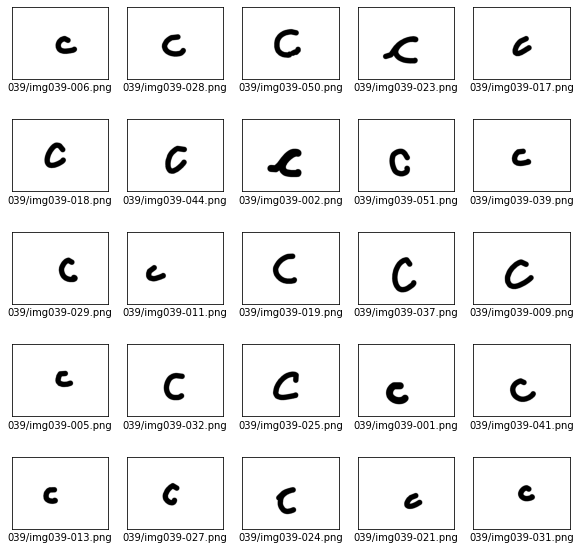

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    images = cv.imread(imgs[i])
    plt.imshow(images , cmap=plt.cm.binary)
    plt.xlabel(imgs[i][14:])
plt.show()

uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 1200, 3)
3240000
uint8
(900, 12

KeyboardInterrupt: ignored

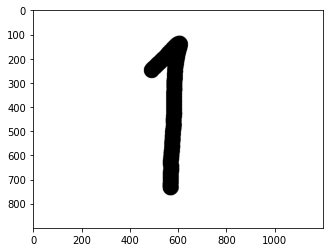

In [ ]:
for i in imgs:
  im = cv.imread(i)
  print(im.dtype)
  print(im.shape)
  print(im.size)

# resizing (900, 1200,3) -> (28,28,3) but results seem to be shocking,  so shape used was earlier (150,200,3)


uint8
(900, 1200, 3)
3240000


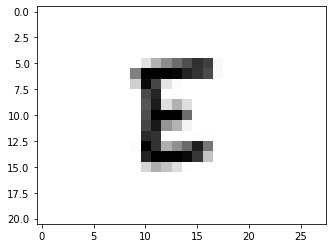

In [ ]:
im = cv.imread('./train/Sample015/img015-015.png')
print(im.dtype)
print(im.shape)
print(im.size)

r = 28/im.shape[1]
dim = (28, int(im.shape[0]*r))

rim = cv.resize(im,dim,interpolation=cv.INTER_AREA )
plt.imshow(rim, cmap=plt.get_cmap('gray'))

#rim = im.reshape(28,28,3)

(21, 28, 3)


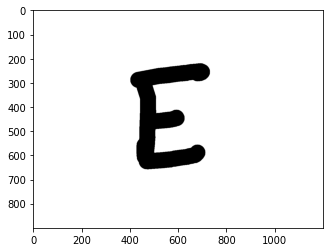

In [ ]:
plt.imshow(im)
print(rim.shape)

## Reshaping the image - Trial 1, images of size (150,200,1)

In [ ]:
# reszing and preprocessing(normalizing)
imagepx = []   
for i in imgs:
  im = cv.imread(i)
  r = 200/im.shape[1]
  dim = (200, int(im.shape[0]*r))

  im = cv.resize(im, dim, interpolation=cv.INTER_AREA)
  im = im.astype("float32")
  im = np.asarray(im)
  #im = np.std(im)
  im = im/255
  imagepx.append(im)
  #print(im.dtype)

#print(imagepx[2])
print(len(imagepx))

2480


Images after resizing

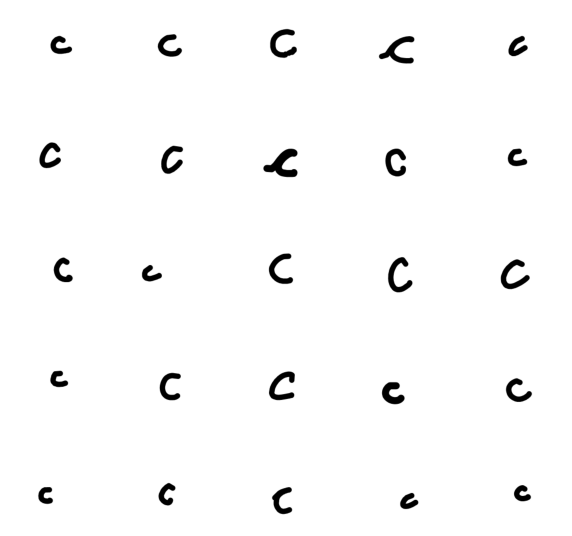

In [ ]:
#print(imagepx[41])
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #images = cv.imread(imgs[i])
    plt.imshow(imagepx[i] , cmap=plt.cm.binary)
    #print(imagepx[i].shape)
    #plt.xlabel(imgs[i][14:])
plt.show()


In [ ]:
imagepx[0].shape

(150, 200, 3)

In [ ]:
X_train, X_v, y_train, y_v = train_test_split(imagepx,y,test_size = 0.25,train_size =0.75, random_state=42, shuffle=True)

print(X_train)

[array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32), array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_v = np.asarray(X_v)
y_v = np.asarray(y_v)

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_v.shape)
print(y_v.shape)

print(y_train)


(1860, 150, 200, 3)
(1860,)
(620, 150, 200, 3)
(620,)
[12 56 19 ... 13 19 58]


# Method 1- Linear regression, since there are 62 classes so instead of taking 62 classes for prediction I tried to get integers as output

In [ ]:
#cnn model building

input = tf.keras.Input(shape = imagepx[0].shape)
x = Conv2D(200, 5, 2, padding='valid', activation='relu')(input)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Conv2D(150, (3,3), 1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Conv2D(100, (3,3), 1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)      
x = Conv2D(100, (2,2), 1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)      
x = Conv2D(100, (1,1), 1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)      

x = Flatten()(x)
x = Dense(64,'softmax')(x)
x = Dropout(0.5)(x)
x = Dense(32,'softmax')(x)
x = Dense(1,'softmax')(x)  # linear regression

In [ ]:
model = tf.keras.Model(inputs=[input], outputs=[x])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 200, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 73, 98, 200)       15200     
_________________________________________________________________
batch_normalization (BatchNo (None, 73, 98, 200)       800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 47, 150)       270150    
_________________________________________________________________
batch_normalization_1 (Batch (None, 34, 47, 150)       600       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 23, 150)       0     

In [ ]:
"""import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)"""

2.4.1


In [ ]:
epoch = 10
bs = 32
num_classes = 1 #1 dense layer

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
#define loss and optimizer, metrics
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
#prints model architecture
plot_model(model, "task2-1.jpg", show_shapes=True, show_layer_names=True)

In [ ]:
#prints the required shapes and input dtypes for each layer
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 150, 200, 3) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
input_3 [(None, 150, 200, 3)] float32
conv2d (None, 150, 200, 3) float32
batch_normalization (None, 73, 98, 200) float32
max_pooling2d (None, 73, 98, 200) float32
conv2d_1 (None, 36, 49, 200) float32
batch_normalization_1 (None, 34, 47, 150) float32
max_pooling2d_1 (None, 34, 47, 150) float32
conv2d_2 (None, 17, 23, 150) float32
batch_normalization_2 (None, 15, 21, 100) float32
max_pooling2d_2 (None, 15, 21, 100) float32
conv2d_3 (None, 7, 10, 100) float32
batch_normalization_3 (None, 6, 9, 100) float32
max_pooling2d_3 (None, 6, 9, 100) float32
conv2d_4 (None, 3, 4, 100) float32
batch_normalization_4 (None, 3, 4, 100) float32
max_pooling2d_4 (None, 3, 4, 100) float32
flatten (None, 1, 2, 100) float32
dense (None, 200) float32
dropout (None, 64) float32
dense_1 (None, 64) float32
dense_2 (None, 32) float32


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
# Callbacks for model
# checkpoints saving

checkpoint_path = "./training-task2_1/checkpoints_task2.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

callbacks = [EarlyStopping(patience=4, monitor='mae'), 
              ReduceLROnPlateau(patience=2, verbose=1), 
             cp_callback]

In [ ]:
#fit the model
history = model.fit(X_train, y_train, 
                           epochs=epoch,
                           batch_size=bs,
                           callbacks=callbacks,
                           validation_data=(X_v, y_v)
                           )

Epoch 1/10
59/59 [==============================] - 174s 3s/step - loss: 1249.7715 - mae: 30.4210 - val_loss: 1252.6854 - val_mae: 30.7371

Epoch 00001: saving model to ./training-task2_1/checkpoints_task2.ckpt
Epoch 2/10
59/59 [==============================] - 174s 3s/step - loss: 1249.7715 - mae: 30.4210 - val_loss: 1252.6854 - val_mae: 30.7371

Epoch 00002: saving model to ./training-task2_1/checkpoints_task2.ckpt
Epoch 3/10
59/59 [==============================] - 173s 3s/step - loss: 1249.7715 - mae: 30.4210 - val_loss: 1252.6854 - val_mae: 30.7371

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00003: saving model to ./training-task2_1/checkpoints_task2.ckpt
Epoch 4/10
59/59 [==============================] - 172s 3s/step - loss: 1249.7715 - mae: 30.4210 - val_loss: 1252.6854 - val_mae: 30.7371

Epoch 00004: saving model to ./training-task2_1/checkpoints_task2.ckpt
Epoch 5/10
59/59 [==============================] - 172s 3s/step - loss: 1

'history = model.fit(\n                         batch_size=batch_size,\n                         epochs = epochs, validation_data = (X_cv, [y_gender_cv, y_ethnicity_cv, y_age_cv]),\n                         steps_per_epoch=(X_train.shape[0] // batch_size)\n                         )'

### Result above are not good

**Saving model-1 in saved model and h5py format**

In [ ]:
model.save("./models/task2_1_saved_model")
model.save("./models/task2_1.h5")

INFO:tensorflow:Assets written to: ./models/task2_1_saved_model/assets


**Plotting history of training-1**

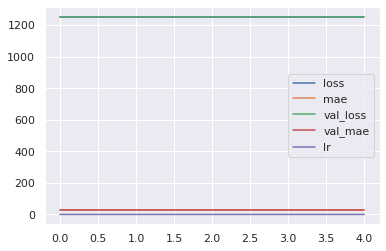

In [ ]:
pd.DataFrame(history.history).plot()     

### For testing, below code can be used

In [ ]:
#evaluate the model
loss, acc = model.evaluate(X_test,y_test, verbose=0)
print("Test Accuracy: %.3f" % acc)
#print('Accuracy for test set: {0}'.format(valid_score[1]))

In [ ]:
#make a prediction
ypred = model.predict(X_test)
print("Predicted: %s (class=%d)" % (ypred, np.argmax(ypred)))

In [ ]:
ypred = np.argmax(ypred, axis=1)
y_test_arg = np.argmax(y_test, axis=1)

In [ ]:
#Performance evaluation
print(classification_report(y_test_arg, ypred))

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_arg, ypred)
sns.heatmap(cm, cmap="Greens", cbar=False, annot=True, fmt='d');

# Method 2 - 62 classes classification

In [ ]:
epoch = 10
bs = 32
labels = np.asarray(labels)
num_classes = 62


In [ ]:
#cnn model building

input = tf.keras.Input(shape = imagepx[0].shape)
x = Conv2D(200, 5, 2, padding='valid', activation='relu')(input)
#x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Conv2D(150, (3,3), 1, padding='valid', activation='relu')(x)
#x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Conv2D(100, (3,3), 1, padding='valid', activation='relu')(x)
#x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)      
x = Conv2D(100, (2,2), 1, padding='valid', activation='relu')(x)
#x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)      
x = Conv2D(100, (1,1), 1, padding='valid', activation='relu')(x)
#x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)      

x = Flatten()(x)
x = Dense(64,'softmax')(x)
x = Dropout(0.5)(x)
x = Dense(32,'softmax')(x)
x = Dense(1,'softmax')(x)  
# x = Dense(num_classes,'softmax')(x)   #if one-hot encoding

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model2 = tf.keras.Model(inputs=[input], outputs=[x])

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 200, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 73, 98, 200)       15200     
_________________________________________________________________
batch_normalization (BatchNo (None, 73, 98, 200)       800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 47, 150)       270150    
_________________________________________________________________
batch_normalization_1 (Batch (None, 34, 47, 150)       600       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 23, 150)       0     

In [ ]:
#define loss and optimizer
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

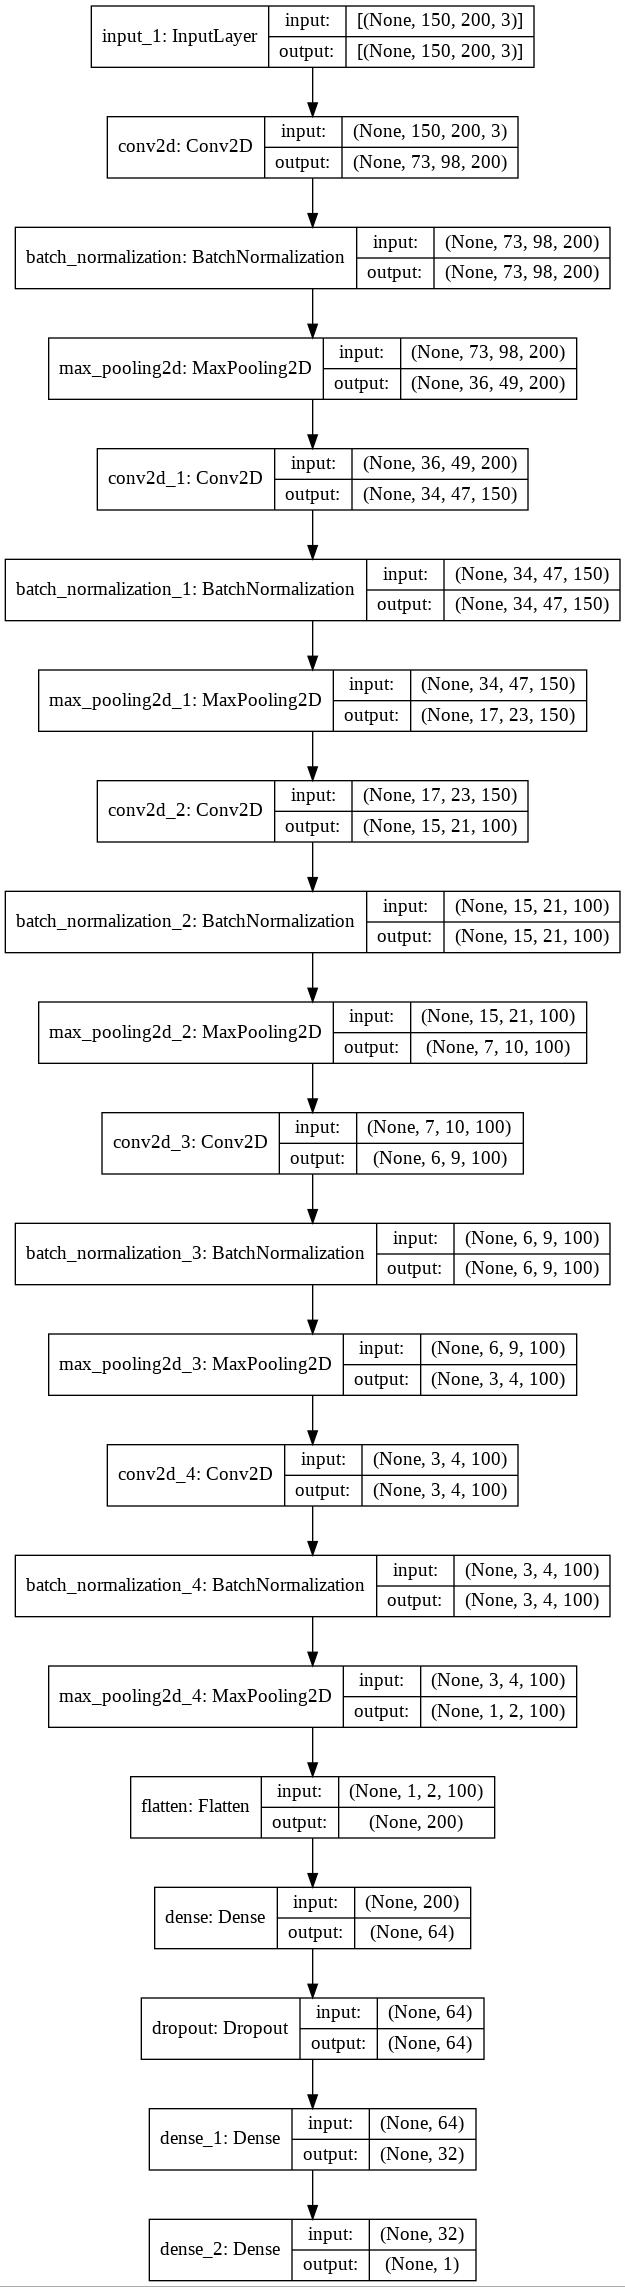

In [ ]:
#prints model architecture
plot_model(model2, "task2-1_method2.jpg", show_shapes=True, show_layer_names=True)

In [ ]:
#prints the required shapes and input dtypes for each layer
[print(i.shape, i.dtype) for i in model2.inputs]
[print(o.shape, o.dtype) for o in model2.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model2.layers]

(None, 150, 200, 3) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
input_1 [(None, 150, 200, 3)] float32
conv2d (None, 150, 200, 3) float32
batch_normalization (None, 73, 98, 200) float32
max_pooling2d (None, 73, 98, 200) float32
conv2d_1 (None, 36, 49, 200) float32
batch_normalization_1 (None, 34, 47, 150) float32
max_pooling2d_1 (None, 34, 47, 150) float32
conv2d_2 (None, 17, 23, 150) float32
batch_normalization_2 (None, 15, 21, 100) float32
max_pooling2d_2 (None, 15, 21, 100) float32
conv2d_3 (None, 7, 10, 100) float32
batch_normalization_3 (None, 6, 9, 100) float32
max_pooling2d_3 (None, 6, 9, 100) float32
conv2d_4 (None, 3, 4, 100) float32
batch_normalization_4 (None, 3, 4, 100) float32
max_pooling2d_4 (None, 3, 4, 100) float32
flatten (None, 1, 2, 100) float32
dense (None, 200) float32
dropout (None, 64) float32
dense_1 (None, 64) float32
dense_2 (None, 32) float32


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
# Callbacks for model
checkpoint_path = "./training-task2-1_method2/checkpoints_task2-1_method2.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

callbacks = [EarlyStopping(patience=4, monitor='val_accuracy'), 
              ReduceLROnPlateau(patience=2, verbose=1), 
             cp_callback]

In [ ]:
#fit the model
history = model2.fit(X_train, y_train, 
                           epochs=epoch,
                           batch_size=bs,
                           callbacks=callbacks,
                           validation_data=(X_v, y_v)
                           )

Epoch 1/10
59/59 [==============================] - 143s 2s/step - loss: 0.0000e+00 - accuracy: 0.0155 - val_loss: 0.0000e+00 - val_accuracy: 0.0097

Epoch 00001: saving model to ./training-task2-1_method2/checkpoints_task2-1_method2.ckpt
Epoch 2/10
59/59 [==============================] - 142s 2s/step - loss: 0.0000e+00 - accuracy: 0.0168 - val_loss: 0.0000e+00 - val_accuracy: 0.0097

Epoch 00002: saving model to ./training-task2-1_method2/checkpoints_task2-1_method2.ckpt
Epoch 3/10
59/59 [==============================] - 142s 2s/step - loss: 0.0000e+00 - accuracy: 0.0187 - val_loss: 0.0000e+00 - val_accuracy: 0.0097

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00003: saving model to ./training-task2-1_method2/checkpoints_task2-1_method2.ckpt
Epoch 4/10
59/59 [==============================] - 141s 2s/step - loss: 0.0000e+00 - accuracy: 0.0123 - val_loss: 0.0000e+00 - val_accuracy: 0.0097

Epoch 00004: saving model to ./training-task2-1_met

'history = model.fit(\n                         batch_size=batch_size,\n                         epochs = epochs, validation_data = (X_cv, [y_gender_cv, y_ethnicity_cv, y_age_cv]),\n                         steps_per_epoch=(X_train.shape[0] // batch_size)\n                         )'

**Saving model-2 in saved model and h5py format**

In [ ]:
model.save("./models/task2_1_saved_model")
model.save("./models/task2_1.h5")

INFO:tensorflow:Assets written to: ./models/task2_1_saved_model/assets


**Plotting history of training-2**

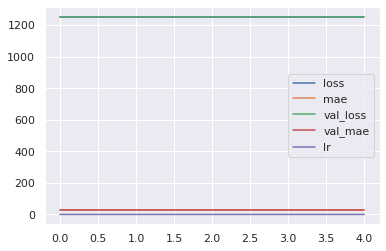

In [ ]:
pd.DataFrame(history.history).plot()     

### Result above are not good

# Method 3 - changes in model

**tried to use data generator for task2-part-2 but the file format was ubyte and couldn't find resources in time to get immages from ubyte files, so now in method 3 shape is (28,28) and grayscale. Also ram was insufficint to process 60000 mnist images**

So now I wanted to train a new CNN model on grayscale images of size (28,28) so that this model could be used in task2-part3(Since mnist images are grayscale with size (28,28))

Reshaping the image - (600,1920,3) -> (28,28) -> (28,28,1)

In [14]:
#preprocessing
imagepx = []   
for i in imgs:
  #im = cv.imread(i, cv.COLOR_BGR2GRAY)
  im = cv.imread(i, cv.IMREAD_GRAYSCALE)

  im = cv.resize(im, (28,28), interpolation=cv.INTER_AREA)
  im = im.astype("float32")
  im = np.asarray(im)
  #im = np.std(im)
  im = im/255
  imagepx.append(im)
  #print(im.dtype)

imagepx = np.asarray(imagepx)
imagepx = imagepx.reshape((imagepx.shape[0], 28, 28, 1))
print(imagepx.shape)
print(imagepx[0].shape)
#print(imagepx[2])
print(len(imagepx))

(2480, 28, 28, 1)
(28, 28, 1)
2480


Saving preprocessed data to avoid repeatation

In [23]:
#np.save("./part1-dataset-28_28.npy", imagepx)

Loading preprocessed data

In [36]:
imagepx = np.load("./part1-dataset-28_28.npy")
print(imagepx.shape)
print(imagepx[0].shape)
print(type(imagepx))
#print(imagepx[2])
print(len(imagepx))

(2480, 28, 28, 1)
(28, 28, 1)
<class 'numpy.ndarray'>
2480


In [37]:
y = to_categorical(y_out)
print(type(y))
print(len(y))

<class 'numpy.ndarray'>
2480


In [38]:
print(y[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [39]:
X_train, X_v, y_train, y_v = train_test_split(imagepx,y,test_size = 0.25,train_size =0.75, random_state=42, shuffle=True)

print(X_train)

[[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.

In [40]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_v = np.asarray(X_v)
y_v = np.asarray(y_v)

In [41]:
print(X_train.shape)
print(y_train.shape)

print(X_v.shape)
print(y_v.shape)

print(y_train)


(1860, 28, 28, 1)
(1860, 62)
(620, 28, 28, 1)
(620, 62)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Code below this cell has not been used

In [42]:
epoch = 10
bs = 32
#labels = np.asarray(labels)
num_classes = 62


In [44]:
tf.keras.backend.clear_session()

In [ ]:
#cnn model building

input = tf.keras.Input(shape =(28,28,1) )
x = Conv2D(32, 5, 2, padding='valid', activation='relu')(input)
#x = Dropout(0.5)(x)
x = MaxPool2D()(x)
x = BatchNormalization()(x)

x = Conv2D(64, (3,3), 1, padding='valid', activation='relu')(x)
x = MaxPool2D()(x)      
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x = Conv2D(128, (2,2), 1, padding='valid', activation='relu')(x)
x = Dropout(0.5)(x)
x = MaxPool2D()(x)      
x = BatchNormalization()(x)

x = Conv2D(256, (1,1), 1, padding='valid', activation='relu')(x)
x = Dropout(0.5)(x)
x = MaxPool2D()(x)      
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dense(64,'softmax')(x)
x = Dropout(0.5)(x)
x = Dense(32,'softmax')(x)
x = Dropout(0.5)(x)

x = Dense(62,'softmax')(x)  


In [ ]:
model1 = tf.keras.Model(inputs=[input], outputs=[x])

In [ ]:
model1.summary()

In [ ]:
#define loss and optimizer
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#prints model architecture
plot_model(model1, "task2-1_trial3.jpg", show_shapes=True, show_layer_names=True)

In [ ]:
# Callbacks for model
checkpoint_path = "./training-task2-1_28_28/checkpoints_task2-1_28_28.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

callbacks = [EarlyStopping(patience=4, monitor='val_accuracy'), 
              ReduceLROnPlateau(patience=2, verbose=1), 
             cp_callback]

#callbacks = [monitor='val_accuracy'), cp_callback]

In [ ]:
#fit the model
history = model1.fit(X_train, y_train, 
                           epochs=epoch,
                           batch_size=bs,
                           callbacks=callbacks,
                           validation_data=(X_v, y_v)
                           )



In [ ]:
model1.save('./models/task2-1_28_28_saveD_model')

INFO:tensorflow:Assets written to: task2-2_base_model_saveD_model/assets


In [ ]:
model1.save('./models/task2-1_28_28.h5')

plot loss and accuracy during training


In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
	# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()